<a href="https://colab.research.google.com/github/DiegoRInacio/Analises_Geoespaciais/blob/main/Geopandas_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos analisr os dados através da biblioteca shpely

Caso já tenha instalado o geopandas esse biblioteca já vem no pacote pois o Geopandas funciona com uma compilação de bibliotecas
***
### Importando bibliotecas

In [ ]:
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

# 1.1 Pontos

Podem possuír duas coordenas ou três

Sendo assim um pontos com duas coordenadas é um ponto bidimenssional
Já um ponto com três informações de X,Y e Z é um ponto tridimenssional por ter a informação altimetrica

In [ ]:
# criando uma variavel de ponto

ponto = Point(5, 10)

Vamos ver o comportamento da variavel "ponto"

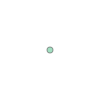

In [ ]:
ponto

Vamos ver o tipo do objeto para ver a sua definição

In [ ]:
print(ponto)

POINT (5 10)


In [ ]:
type(ponto)

shapely.geometry.point.Point

# Ponto tem atributos e funções

Atibutos = informações detalhadas como caracteriticas do local informado

Funções = Medir distâncias entre outras funções importantes para ser realizadas

In [ ]:
#Utilizando a função coords

list(ponto.coords)

[(5.0, 10.0)]

In [ ]:
x = ponto.x
y = ponto.y

print('{} , {}'.format(x, y))

5.0 , 10.0


##### Também pode ser calculado a distância entre dois pontos

In [ ]:
ponto_1 = Point(2, 3)
ponto_2 = Point(5, 7)

distancia = ponto_1. distance(ponto_2)

print('A dsitância entre o ponto 1 e 2 ponto 2 é de: {}'.format(distancia))

A dsitância entre o ponto 1 e 2 ponto 2 é de: 5.0


# Agora vamos criar um objeto linha com o LineString

In [ ]:
# Vamos criar mais um ponto para termos três seções de pontos

ponto_3 = Point(2, 10)

linha = LineString([ponto_1, ponto_2, ponto_3])

Vamos Ver como é apresentada a variavel linha

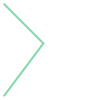

In [ ]:
linha

In [ ]:
print(linha)

LINESTRING (2 3, 5 7, 2 10)


In [ ]:
type(linha)

shapely.geometry.linestring.LineString

### Assim como o ponto as geometrias de linha possuem atributos e funções importante, bem semelhantes, com a diferença de que a linha é uma seção de pontos que se interligam

In [ ]:
# Ultilizando a função coords

list(linha.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0)]

In [ ]:
linha.xy

(array('d', [2.0, 5.0, 2.0]), array('d', [3.0, 7.0, 10.0]))

In [ ]:
coord_x = list(linha.xy[0])
coord_y = list(linha.xy[1])

print('coordenada x: {}'.format(coord_x))
print('coordenada y: {}'.format(coord_y))

coordenada x: [2.0, 5.0, 2.0]
coordenada y: [3.0, 7.0, 10.0]


### Também é possivel obter o complimento da linha

In [ ]:
linha.length

9.242640687119284

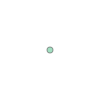

In [ ]:
linha.centroid

In [ ]:
print(linha.centroid)

POINT (3.5 6.606601717798214)


# Agroa iremos ver os poligonos

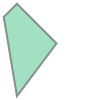

In [ ]:
# criando uma estrutura de poligono

ponto_4 = Point(1, 9)

poly = Polygon([ponto_1, ponto_2, ponto_3, ponto_4])

poly

# Vamos ver o comportamento da variavel poly

In [ ]:
print(poly)

POLYGON ((2 3, 5 7, 2 10, 1 9, 2 3))


In [ ]:
type(poly)

shapely.geometry.polygon.Polygon

# Polígonos Atributos e Funções

Assim como os pontos e as linhas os poligonos não ficam para trás em rralaçãoaos atributos e funções, agora podemos calcular áreas de forma muito mais facil do que se fosse apenas linhas e pontos

In [ ]:
# Obter coordenas dos poligonos
list(poly.exterior.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0), (1.0, 9.0), (2.0, 3.0)]

In [ ]:
#Obter a área de uma polígono
poly_area = poly.area

print('A área do polígono é de: {}m²'.format(poly_area))

A área do polígono é de: 14.0m²


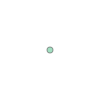

In [ ]:
#Obter o ponto centroid de um polígono
poly_centro = poly.centroid

poly_centro

In [ ]:
#Coordenadas do ponto centróid
print(poly_centro)

POINT (2.666666666666667 6.833333333333334)


In [ ]:
#Obter as coordenas do bounding box

poly.bounds

(1.0, 3.0, 5.0, 10.0)

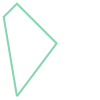

In [ ]:
#Obter a linha do exterior

poly_exterior = poly.exterior

poly_exterior

In [ ]:
#obtebdo coordenadas das linhas do exterior do polígono

print('Coordenadas do exterior do poligono: {}'.format(poly_exterior))

Coordenadas do exterior do poligono: LINEARRING (2 3, 5 7, 2 10, 1 9, 2 3)


In [ ]:
#Obter o tamnho da linha exterior

tamanho_linha_exterior = poly.exterior.length

print('O perimetro do exterior do pligono mede: {}m²'.format(tamanho_linha_exterior))

O perimetro do exterior do pligono mede: 16.739616779790598m²


# Operações basicas entre geometrias

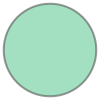

In [ ]:
#Buffer

circulo_1 = ponto_1.buffer(5)
circulo_2 = ponto_2.buffer(5)

circulo_1

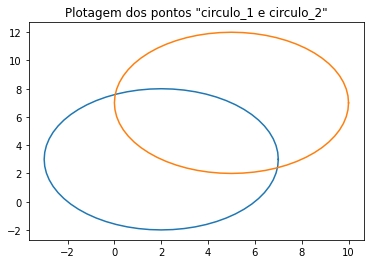

In [ ]:
#Plotando os dois circulos

plt.title('Plotagem dos pontos "circulo_1 e circulo_2"')
x,y = circulo_1.exterior.xy
plt.plot(x,y)

x,y = circulo_2.exterior.xy
plt.plot(x,y)

plt.show()

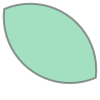

In [ ]:
#Realizando uma interseção

circulo_intersect = circulo_1.intersection(circulo_2)

circulo_intersect

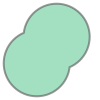

In [ ]:
#realizando união

circulo_union = circulo_1.union(circulo_2)

circulo_union

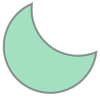

In [ ]:
#diferença entre as áreas

circulo_diff1 = circulo_1.difference(circulo_2)

circulo_diff1

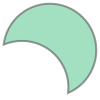

In [ ]:
circulo_diff2 = circulo_2.difference(circulo_1)

circulo_diff2

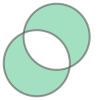

In [ ]:
#Diferença simétrica

circulo_simetri = circulo_1.symmetric_difference(circulo_2)

circulo_simetri

# Resumo dessa aula
  - Foi criado objetos de pontos linhas e poligonos
  - Froam usadas funções básicas  dos objetos  geometricos
  - Foram realizadas operações entre os GeoDataFrames